In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Завантажуємо файл та виводимо перші 5 рядків
df = pd.read_csv('bestsellers with categories.csv')
print("--- Файл успішно завантажено. Перші 5 рядків: ---")
print(df.head())

--- Файл успішно завантажено. Перші 5 рядків: ---
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [4]:
# Розміри датасету
print("--- Розміри датасету (рядки, стовпці) ---")
print(df.shape)


--- Розміри датасету (рядки, стовпці) ---
(550, 7)


In [5]:
# Про скільки книг зберігає дані датасет?
print(f"Відповідь: {df.shape[0]}")

Відповідь: 550


In [6]:
# Змінюємо назви стовпців 
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print("--- Нові назви стовпців ---")
print(df.columns.tolist())

--- Нові назви стовпців ---
['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [7]:
# Перевіряємо чи у всіх рядках вистачає даних, виводимо кількість (na)
print("--- Кількість пропусків (NA) у кожному стовпці ---")
na_counts = df.isna().sum()
print(na_counts)


--- Кількість пропусків (NA) у кожному стовпці ---
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [8]:
# Чи є в якихось змінних пропуски? (Так / ні)
has_na = "Так" if na_counts.sum() > 0 else "Ні"
print(f"Відповідь: {has_na}")

Відповідь: Ні


In [9]:
# Перевіряємо, які є унікальні значення в колонці genre
unique_genres = df['genre'].unique()
print("--- Унікальні жанри ---")
print(unique_genres)

--- Унікальні жанри ---
['Non Fiction' 'Fiction']


In [10]:
# Які є унікальні жанри?
print(f"Відповідь: {', '.join(unique_genres)}")

Відповідь: Non Fiction, Fiction


--- Діаграма розподілу цін (Histogram) ---


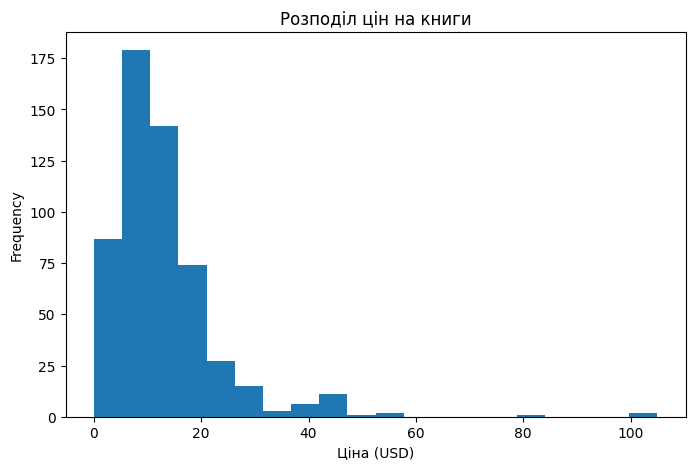

In [11]:
print("--- Діаграма розподілу цін (Histogram) ---")
plt.figure(figsize=(8, 5))
df['price'].plot(kind='hist', bins=20, title='Розподіл цін на книги')
plt.xlabel('Ціна (USD)')
plt.show()

In [12]:
# Визначаємо max, min, mean, median ціни
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()


In [13]:
# Відповіді:
print(f"Максимальна ціна? Відповідь: {max_price}")
print(f"Мінімальна ціна? Відповідь: {min_price}")
print(f"Середня ціна? Відповідь: {mean_price:.2f}")
print(f"Медіанна ціна? Відповідь: {median_price}")


Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.10
Медіанна ціна? Відповідь: 11.0


In [14]:
# Який рейтинг у датасеті найвищий?
max_rating = df['user_rating'].max()
print(f"Який рейтинг у датасеті найвищий? Відповідь: {max_rating}")

Який рейтинг у датасеті найвищий? Відповідь: 4.9


In [15]:
# Скільки книг мають такий рейтинг?
count_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Скільки книг мають такий рейтинг? Відповідь: {count_max_rating}")

Скільки книг мають такий рейтинг? Відповідь: 52


In [16]:
# Яка книга має найбільше відгуків?
most_reviewed_book = df.loc[df['reviews'].idxmax()]
print(f"Яка книга має найбільше відгуків? Відповідь: {most_reviewed_book['name']} (Автор: {most_reviewed_book['author']}, Відгуки: {most_reviewed_book['reviews']})")

Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing (Автор: Delia Owens, Відгуки: 87841)


In [17]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
df_2015 = df[df['year'] == 2015]
most_expensive_2015 = df_2015.loc[df_2015['price'].idxmax()]
print(f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: {most_expensive_2015['name']} (Ціна: ${most_expensive_2015['price']})")

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: Publication Manual of the American Psychological Association, 6th Edition (Ціна: $46)


In [18]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
fiction_2010_count = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: {fiction_2010_count}")

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 20


In [19]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
rating_4_9_years_count = df[
    (df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))
].shape[0]
print(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: {rating_4_9_years_count}")

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1


In [20]:
# Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів
sorted_2015_cheap = df[
    (df['year'] == 2015) & (df['price'] < 8)
].sort_values(by='price', ascending=True)


In [21]:
# Яка книга остання у відсортованому списку?
last_book_sorted = sorted_2015_cheap.iloc[-1]
print(f"Яка книга остання у відсортованому списку? Відповідь: {last_book_sorted['name']} (Ціна: ${last_book_sorted['price']})")

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10) (Ціна: $7)


In [22]:
# Подивимося на максимальну та мінімальну ціни для кожного з жанрів
price_by_genre = df.groupby('genre')['price'].agg(['max', 'min'])

In [23]:
# Відповіді:
print("\n--- Максимальні та Мінімальні ціни за Жанрами ---")
print(price_by_genre)
print(f"Максимальна ціна для жанру Fiction: Відповідь: {price_by_genre.loc['Fiction', 'max']}")
print(f"Мінімальна ціна для жанру Fiction: Відповідь: {price_by_genre.loc['Fiction', 'min']}")
print(f"Максимальна ціна для жанру Non Fiction: Відповідь: {price_by_genre.loc['Non Fiction', 'max']}")
print(f"Мінімальна ціна для жанру Non Fiction: Відповідь: {price_by_genre.loc['Non Fiction', 'min']}")


--- Максимальні та Мінімальні ціни за Жанрами ---
             max  min
genre                
Fiction       82    0
Non Fiction  105    0
Максимальна ціна для жанру Fiction: Відповідь: 82
Мінімальна ціна для жанру Fiction: Відповідь: 0
Максимальна ціна для жанру Non Fiction: Відповідь: 105
Мінімальна ціна для жанру Non Fiction: Відповідь: 0


In [24]:
# Створюємо новий датафрейм, який вміщатиме кількість книг для кожного з авторів
books_by_author = df.groupby('author')['name'].count().reset_index()
books_by_author.columns = ['author', 'book_count']

print("\n--- Кількість книг за Автором ---")
print(books_by_author.head())


--- Кількість книг за Автором ---
                       author  book_count
0            Abraham Verghese           2
1              Adam Gasiewski           1
2               Adam Mansbach           1
3                   Adir Levy           1
4  Admiral William H. McRaven           1


In [25]:
# Якої розмірності вийшла таблиця?
print(f"Якої розмірності вийшла таблиця? Відповідь: {books_by_author.shape}")

Якої розмірності вийшла таблиця? Відповідь: (248, 2)


In [26]:
# Який автор має найбільше книг?
top_author = books_by_author.loc[books_by_author['book_count'].idxmax()]
print(f"Який автор має найбільше книг? Відповідь: {top_author['author']}")

Який автор має найбільше книг? Відповідь: Jeff Kinney


In [27]:
# Скільки книг цього автора?
print(f"Скільки книг цього автора? Відповідь: {top_author['book_count']}")

Скільки книг цього автора? Відповідь: 12


In [28]:
# Тепер створюємо другий датафрейм, який буде вміщати середній рейтинг для кожного автора
rating_by_author = df.groupby('author')['user_rating'].mean().reset_index()
rating_by_author.columns = ['author', 'avg_rating']

In [29]:
# У якого автора середній рейтинг мінімальний?
min_rating_author = rating_by_author.loc[rating_by_author['avg_rating'].idxmin()]
print(f"У якого автора середній рейтинг мінімальний? Відповідь: {min_rating_author['author']}")

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt


In [30]:
# Який у цього автора середній рейтинг?
print(f"Який у цього автора середній рейтинг? Відповідь: {min_rating_author['avg_rating']:.2f}")

Який у цього автора середній рейтинг? Відповідь: 3.90


In [31]:
# З'єднуємо останні два датафрейми
combined_author_stats = pd.merge(books_by_author, rating_by_author, on='author', how='inner')

In [49]:
print("\n--- З'єднана статистика за автором ---")
print(combined_author_stats.head())



--- З'єднана статистика за автором ---
                       author  book_count  avg_rating
0            Abraham Verghese           2         4.6
1              Adam Gasiewski           1         4.4
2               Adam Mansbach           1         4.8
3                   Adir Levy           1         4.8
4  Admiral William H. McRaven           1         4.7


In [50]:
# Відсортуємо датафрейм за зростаючою кількістю книг та зростаючим рейтингом
final_sorted_df = combined_author_stats.sort_values(
    by=['book_count', 'avg_rating'],
    ascending=[True, True]
)

In [51]:
# Який автор перший у списку?
first_author_sorted = final_sorted_df.iloc[0]['author']
print(f"Який автор перший у списку? Відповідь: {first_author_sorted}")

Який автор перший у списку? Відповідь: Muriel Barbery


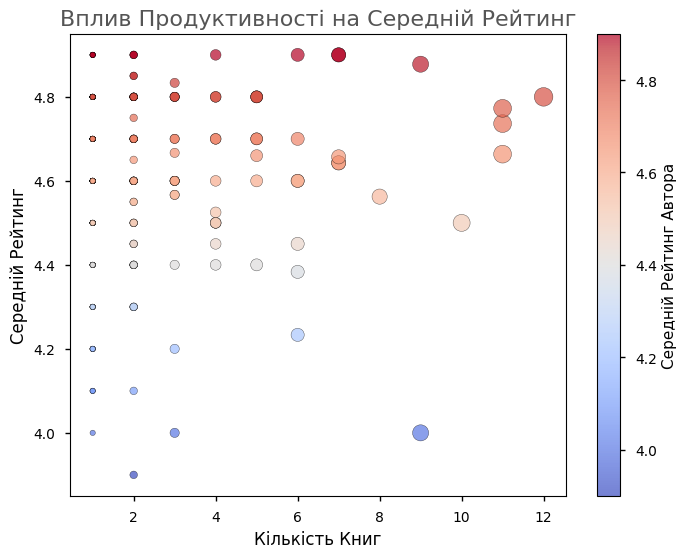

In [35]:
# --- Графік 1: Залежність Рейтингу від Кількість Книг (Scatter Plot з Matplotlib) ---
plt.figure(figsize=(8, 6))
plt.scatter(combined_author_stats['book_count'], combined_author_stats['avg_rating'], 
            alpha=0.7, s=combined_author_stats['book_count']*15, 
            c=combined_author_stats['avg_rating'], cmap='coolwarm', edgecolor='black') 
plt.colorbar(label='Середній Рейтинг Автора')
plt.title('Вплив Продуктивності на Середній Рейтинг', fontsize=16, color='#555555')
plt.xlabel('Кількість Книг', fontsize=12)
plt.ylabel('Середній Рейтинг', fontsize=12)
plt.style.use('seaborn-v0_8-notebook') 
plt.show()


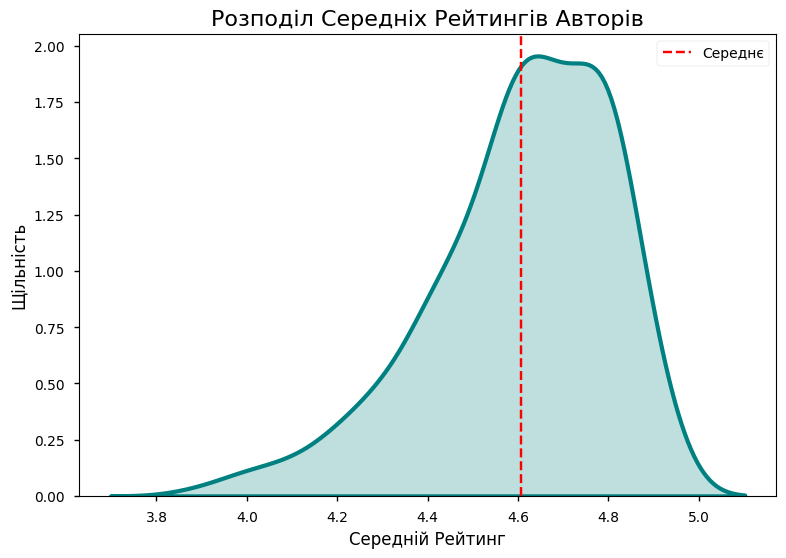

In [36]:
# --- Графік 2: Розподіл Середніх Рейтингів (KDE Plot з Seaborn) ---
plt.figure(figsize=(9, 6))
# KDE (Kernel Density Estimate) - показує плавний розподіл
sns.kdeplot(combined_author_stats['avg_rating'], fill=True, color='teal', linewidth=3)
plt.title('Розподіл Середніх Рейтингів Авторів', fontsize=16, fontweight='light')
plt.xlabel('Середній Рейтинг', fontsize=12)
plt.ylabel('Щільність', fontsize=12)
plt.axvline(combined_author_stats['avg_rating'].mean(), color='red', linestyle='--', label='Середнє')
plt.legend()
plt.style.use('default')
plt.show()

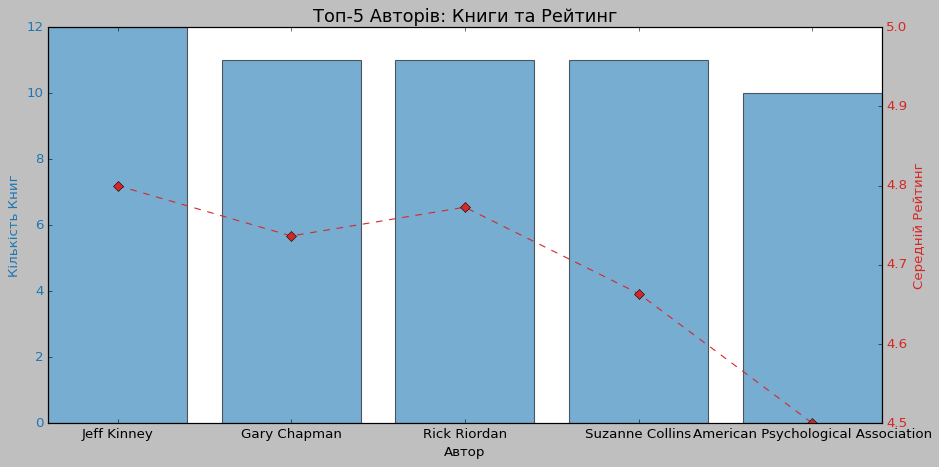

In [38]:
# --- Графік 3: Співвідношення Книг та Рейтингу для Топ Авторів (Dual Axis Plot) ---
top_authors_for_plot = combined_author_stats.sort_values(by='book_count', ascending=False).head(5)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Вісь 1: Кількість Книг (Bar Plot)
color = 'tab:blue'
ax1.set_xlabel('Автор')
ax1.set_ylabel('Кількість Книг', color=color)
ax1.bar(top_authors_for_plot['author'], top_authors_for_plot['book_count'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=0)

# Вісь 2: Середній Рейтинг (Line Plot)
ax2 = ax1.twinx() # Створюємо другу вісь Y
color = 'tab:red'
ax2.set_ylabel('Середній Рейтинг', color=color)
ax2.plot(top_authors_for_plot['author'], top_authors_for_plot['avg_rating'], color=color, marker='D', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(4.5, 5.0) # Обмежуємо для кращої візуалізації рейтингу

plt.title('Топ-5 Авторів: Книги та Рейтинг', fontsize=16)
fig.tight_layout()
plt.style.use('bmh') # Стиль BMH (Bayesian Methods for Hackers)
plt.show()
